In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [96]:
df = pd.read_csv('../data/2022-12-10_15-37-56.csv', parse_dates=['datetime'])

In [97]:
df.head()

,id,datetime,x_cm,y_cm,z_cm,size_mm2,speed_mps,acceleration_mps2,distance_cm
0,01GKW6QRSE1VVS7TSTF7VP4AXS,2022-12-09 19:45:31.036858,21.462158,-67.038605,472.10184,4.777931,0.028703,0.987622,0.028703
1,01GKW6QRSEY8WCNF4A24J6NDJK,2022-12-09 19:45:31.036858,-3.977263,-43.582720,497.24716,7.253573,0.186998,2.246623,0.186998
2,01GKW6QRSE1VVS7TSTF7VP4AXS,2022-12-09 19:45:31.046858,21.458517,-67.038050,472.08972,4.371447,0.012666,-1.603685,0.012666
3,01GKW6QRSEY8WCNF4A24J6NDJK,2022-12-09 19:45:31.046858,-3.818697,-43.655010,497.23477,7.463520,0.174706,-1.229202,0.174706
4,01GKW6QRSE1VVS7TSTF7VP4AXS,2022-12-09 19:45:31.056858,21.454199,-67.033165,472.06082,4.000260,0.029622,1.695632,0.029622


<AxesSubplot: xlabel='x_cm', ylabel='y_cm'>

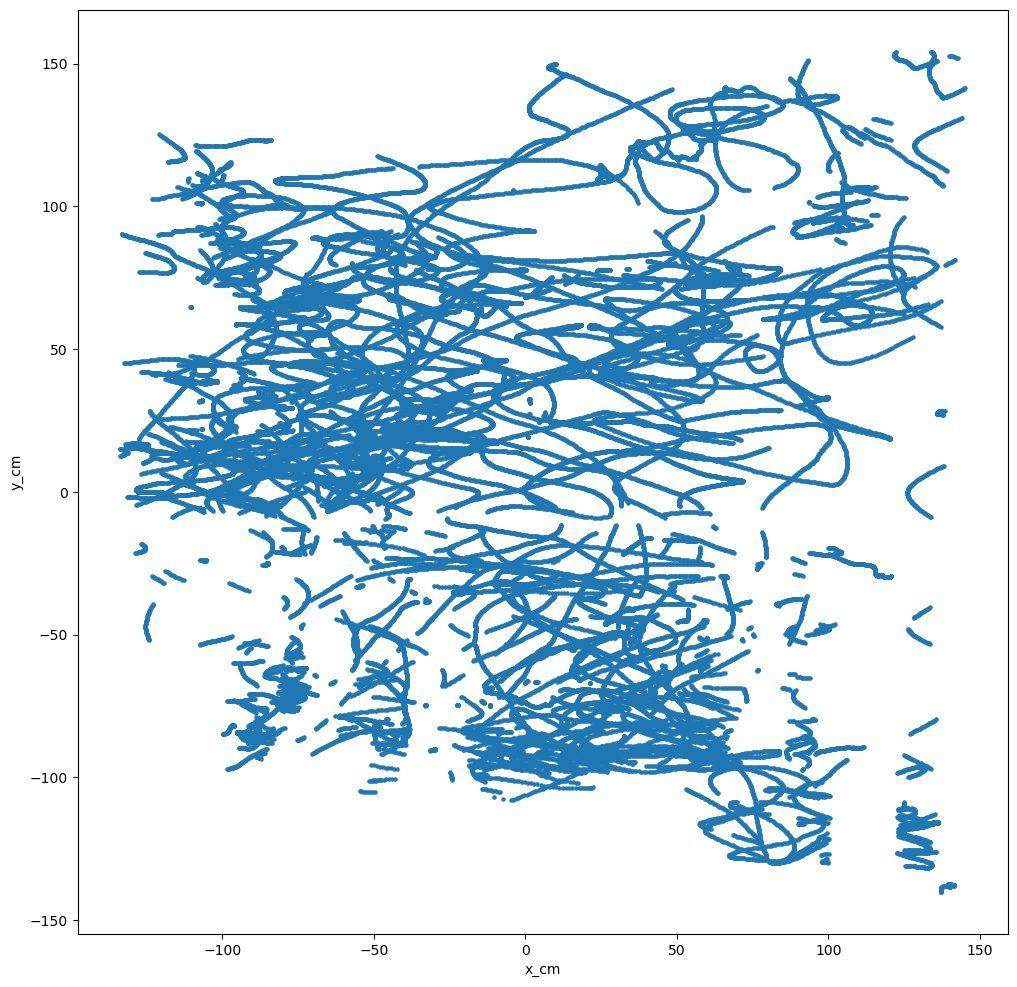

In [8]:
df.plot.scatter(x="x_cm", y="y_cm", figsize=(12, 12), marker='.')

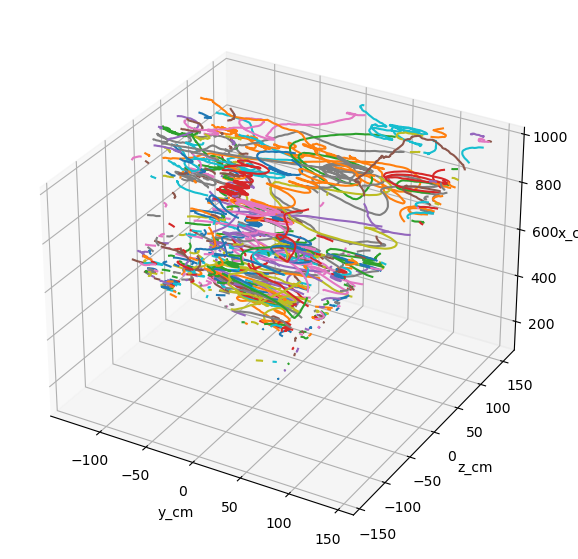

In [119]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
for group_name, group_df in df.groupby("id"):
    ax.plot( group_df['x_cm'], group_df['y_cm'], group_df['z_cm'])
ax.set_xlabel('y_cm')
ax.set_ylabel('z_cm')
ax.set_zlabel('x_cm')
plt.show()

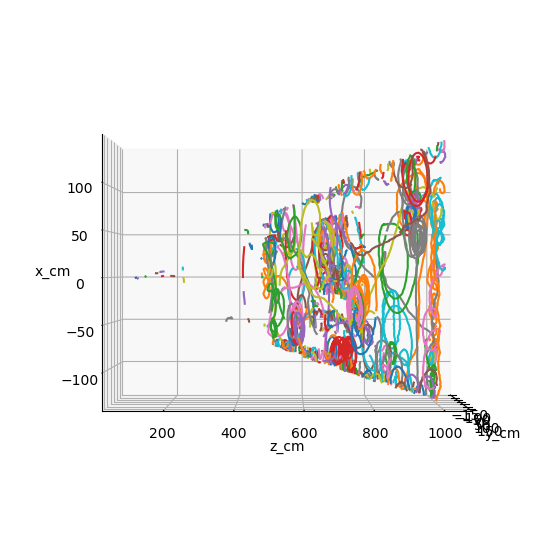

In [40]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.view_init(elev=0, azim=0, roll=0)
for group_name, group_df in df.groupby("id"):
    ax.plot( group_df['y_cm'], group_df['z_cm'], group_df['x_cm'])
ax.set_xlabel('y_cm')
ax.set_ylabel('z_cm')
ax.set_zlabel('x_cm')
plt.show()

Let's just focus on the long tracks, longer than 10 seconds long.

In [113]:
long_tracks = []
for group_name, group_df in df.groupby("id"):

    # calculate the length in time of each track
    duration = group_df['datetime'].iloc[-1] - group_df['datetime'].iloc[0]
    duration = duration.total_seconds()

    if duration > 10:
        long_tracks.append(group_name)
        print(f'{group_name}: {duration} seconds')

01GKW6VJ1FY1TRRY7TW69E2SNC: 17.610078 seconds
01GKW6WKH16XNDE8HCSZXQPRR1: 13.58006 seconds
01GKW772JB5XA0PCJT61KSCPBX: 36.600161 seconds
01GKW7BS03CQPE990Y3VCX732M: 14.470064 seconds
01GKW7CCKKV6ETF79D8ZHZX62W: 10.830047 seconds
01GKW7D6TNAF3N1C4SEVVQ3WJ5: 11.52005 seconds
01GKW7DZ12PVN1HNN3JY328RG7: 15.030066 seconds
01GKW7FXY6WDN6XFXRAA53D2K0: 11.820052 seconds
01GKW7G0C0JNHH92TCTFF36KRJ: 10.710047 seconds
01GKW7GSY4K7AJD8MBWK19DZ9T: 18.530082 seconds
01GKW7HC7E6EY3V7NQDMNSWBQE: 14.760065 seconds
01GKW7JWZ440T8KJFEGSQ3APW8: 10.660047 seconds


[Matplotlib 3D view angles](https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html) use a view-direction convention that's different than our data.

| mpl | data |
|-----|------|
| x   | z    |
| y   | x    |
| z   | y    |

In [181]:
def plot_tracks(
    _df,
    elev=0,
    azim=0,
    roll=0,
    title='',
    legend=False
):

    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")
    for group_name, group_df in _df.groupby("id"):
        ax.plot(group_df['z_cm'], group_df['x_cm'], group_df['y_cm'], label=group_name)
    ax.view_init(elev=elev, azim=azim, roll=roll)
    ax.set_xlabel('z_cm')
    ax.set_ylabel('x_cm')
    ax.set_zlabel('y_cm')
    ax.set_title(title, fontsize=20)
    if legend:
        ax.legend(loc='upper left', ncols=3, columnspacing=1, frameon=False, fontsize=8,
        borderpad=1.0)
    plt.close()
    return fig

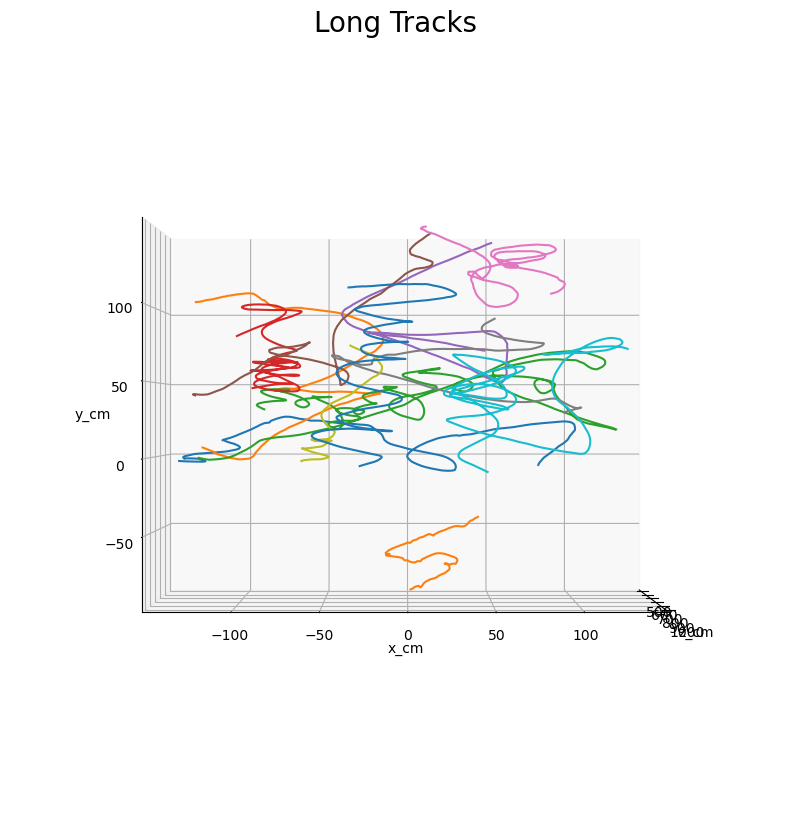

In [182]:
sub = df[df['id'].isin(long_tracks)].copy()
plot_tracks(sub, title='Long Tracks')

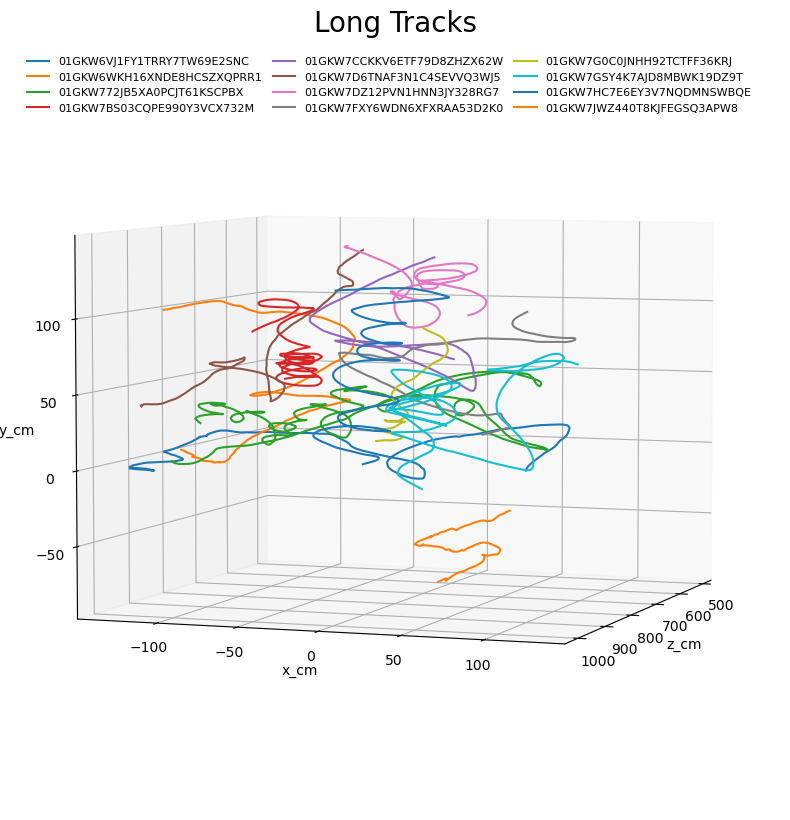

In [183]:
sub = df[df['id'].isin(long_tracks)].copy()
plot_tracks(sub, title='Long Tracks', elev=5, azim=20, legend=True)

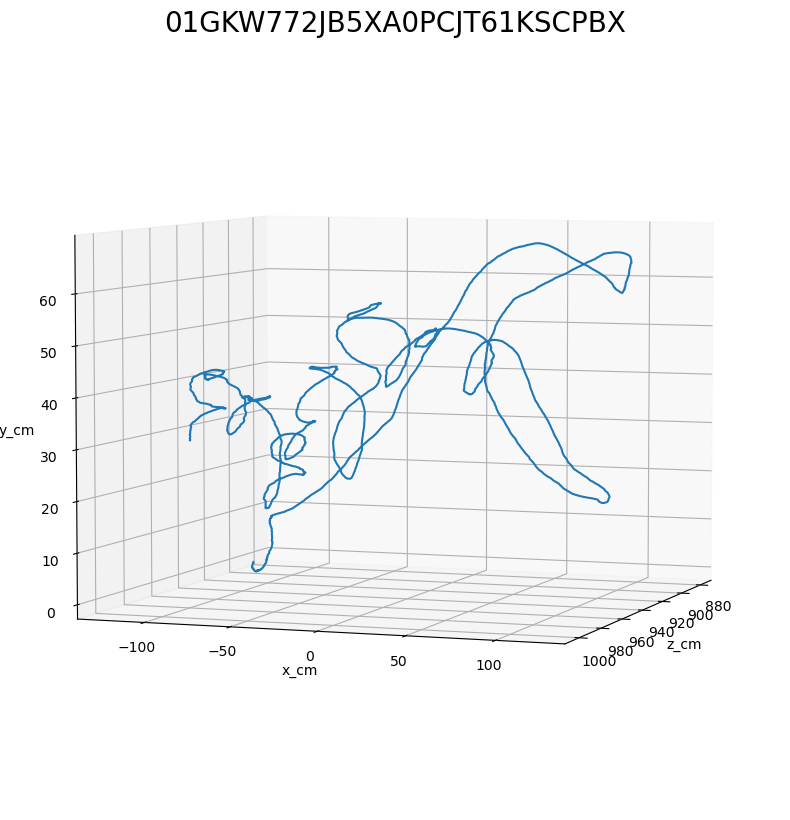

In [187]:
sub = df[df['id'] == long_tracks[2]].copy()
plot_tracks(sub, title=long_tracks[2],  elev=5, azim=20)

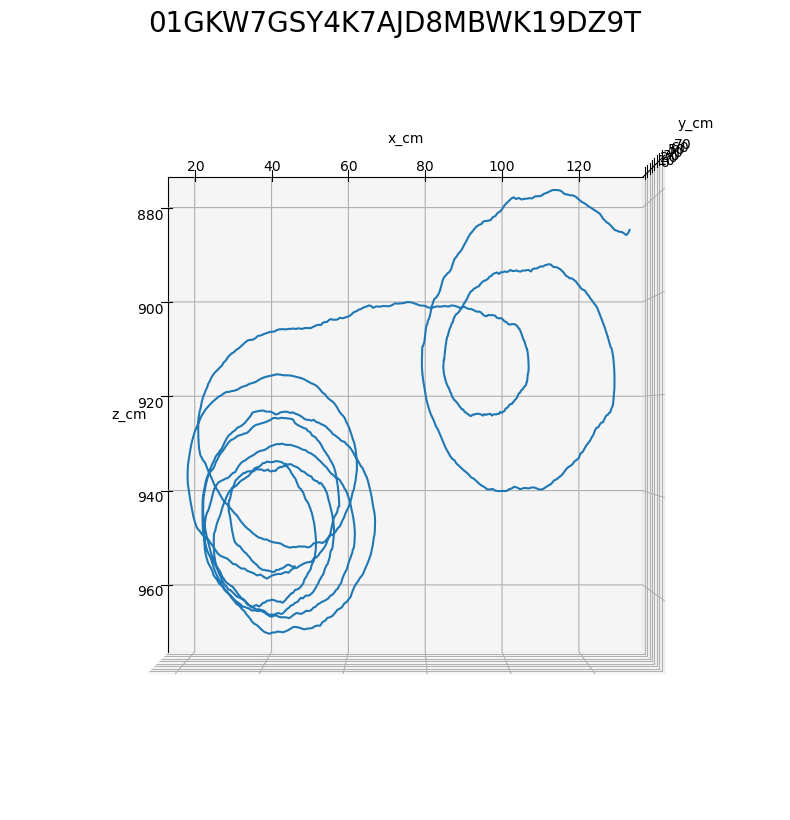

In [190]:
sub = df[df['id'] == long_tracks[9]].copy()
plot_tracks(sub, title=long_tracks[9],  elev=90, azim=0)